# Cluster definition

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.3 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.8


# EHT clusters

In [37]:
adata = sc.read('./write/All_outer_leidenv2.h5ad')

In [ ]:
sc.tl.leiden(adata,resolution=0.3,restrict_to=('Leiden_v2',['25']))

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


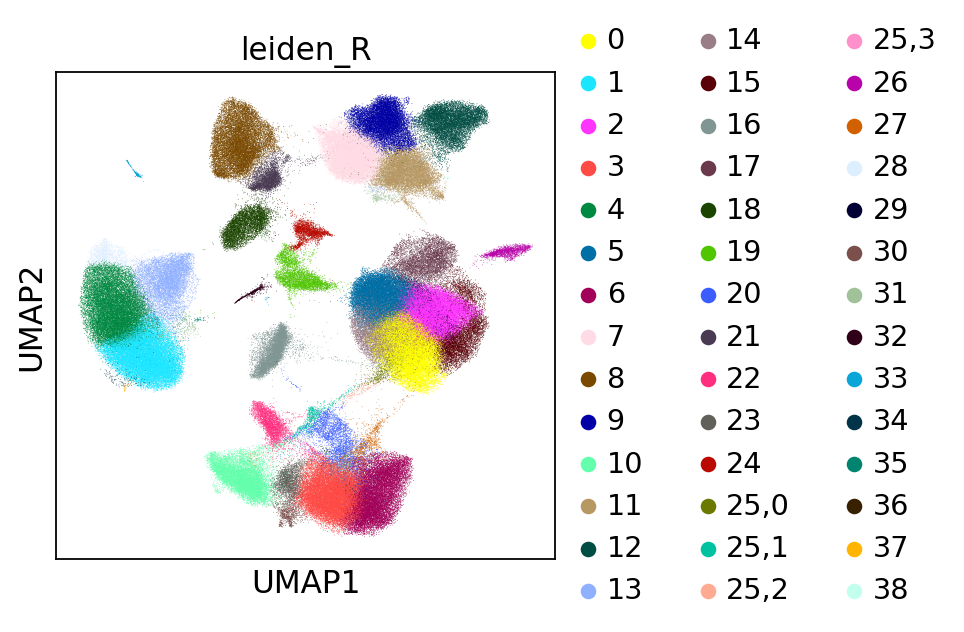

In [27]:
sc.pl.umap(adata,color='leiden_R')

In [30]:
adata.obs['CT_new2'] = [f"Leiden_v2_Cluster{adata.obs.leiden_R[x]}" if adata.obs.Leiden_v2[x]=='25' else adata.obs.CT_new1[x] for x in adata.obs_names]

In [39]:
# Gradient ones
adata.uns['CT_new2_colors']

array(['#023fa5', '#7d87b9', '#bec1d4', '#d6bcc0', '#bb7784', '#8e063b',
       '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9', '#e07b91', '#d33f6a',
       '#11c638', '#8dd593', '#c6dec7', '#ead3c6', '#f0b98d', '#ef9708',
       '#0fcfc0', '#9cded6', '#d5eae7', '#f3e1eb', '#f6c4e1'],
      dtype=object)

In [40]:
adata.uns['CT_new2_colors'] = ['#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#42d4f4',
                               '#023fa5', '#7d87b9', '#bec1d4', '#11c638',
       '#800000', '#aa0000', '#808000', '#ffd8b1', '#000075', '#a9a9a9',
       '#e6194B', '#3cb44b', '#4363d8', '#f58231', '#911eb4', '#f032e6',
       '#ff7f0e']

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


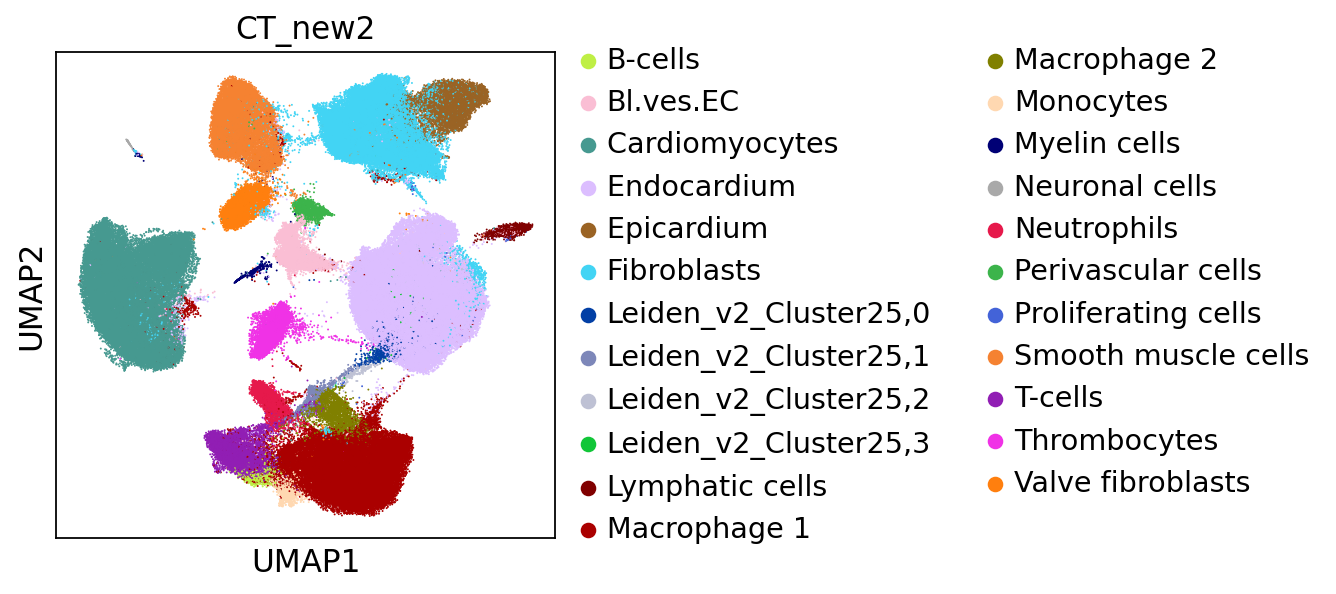

In [54]:
sc.pl.umap(adata,color='CT_new2',size=3,save='_subc25.pdf')

# Proliferating clusters

In [ ]:
adata = sc.read('./write/All_outer_filtered.h5ad')

In [ ]:
adata.obs['CT_new'] = [x.split('(')[0] for x in adata.obs.Cell_type]

In [ ]:
adata.obs['CT_fateid'] = ['Macrophages 2' if (adata.obs['Leiden_v1'][x]=='15' and adata.obs['CT_new'][x]=='Macrophage ') else adata.obs['CT_new'][x] for x in adata_Mac.obs_names]
adata.obs['CT_fateid'] = ['T-cells 2' if (adata.obs['Leiden_v1'][x]=='15' and adata.obs['CT_new'][x]=='T-cells') else adata.obs['CT_new'][x] for x in adata.obs_names]

In [19]:
adata.obs['EHT_tc'] = adata.obs.CT_fateid.cat.rename_categories({
    'Leiden_v2_Cluster25,0':'tc2',
    'Leiden_v2_Cluster25,1':'tc4',
    'Leiden_v2_Cluster25,3':'tc1',
    'Leiden_v2_Cluster25,2':'tc3',
    'T-cells 2':'tc5',
    'Macrophage 2':'tc6',
})

In [20]:
adata_tc = adata[adata.obs.EHT_tc.str.startswith('tc')]

In [ ]:
adata_tc.obs['EHT_num'] = adata_tc.obs.EHT_tc.cat.rename_categories({
    'tc0':0,
    'tc1':1,
    'tc2':2,
    'tc3':3,
    'tc4':4,
    'tc5':5,
    'tc6':6,
})

In [ ]:
adata.write('./write/c25Leuko_wt_filtered.h5ad')